In [31]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing library for splitting the data
from sklearn.model_selection import train_test_split

# Importing regression models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Spain.csv")
df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,De Gea,27,Spain,91,93,72000000.0,260000.0,1471,Right,4.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Goalkeeper,26-30
1,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,2201,Right,4.0,...,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,Defender,31-35
2,David Silva,32,Spain,90,90,60000000.0,285000.0,2115,Left,4.0,...,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M,Midfielder,31-35
3,Sergio Busquets,29,Spain,89,89,51500000.0,315000.0,2065,Right,4.0,...,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M,Midfielder,26-30
4,Isco,26,Spain,88,91,73500000.0,315000.0,2137,Right,3.0,...,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M,Attacker,26-30


In [3]:
df['Position'].value_counts()

GK     116
ST     109
CB     104
RB      87
RM      82
LB      81
CM      80
LM      76
CDM     65
CAM     57
RCB     36
LCB     31
LCM     28
RCM     28
LS      15
RW      15
LW      13
LDM     12
RS      11
RDM     10
RWB      4
CF       4
LWB      4
LF       2
RF       1
0        1
Name: Position, dtype: int64

In [4]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

22-25    322
26-30    307
16-21    271
31-35    153
36-40     19
41-45      0
Name: Age_Ranges, dtype: int64

In [5]:
maxEarners= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
maxEarners = maxEarners.set_index('Name')
maxEarners.head()

,Value,Wage
Name,,
Sergio Ramos,51000000.0,380000.0
Sergio Busquets,51500000.0,315000.0
Isco,73500000.0,315000.0
David Silva,60000000.0,285000.0
De Gea,72000000.0,260000.0


Text(0, 0.5, 'Wage')

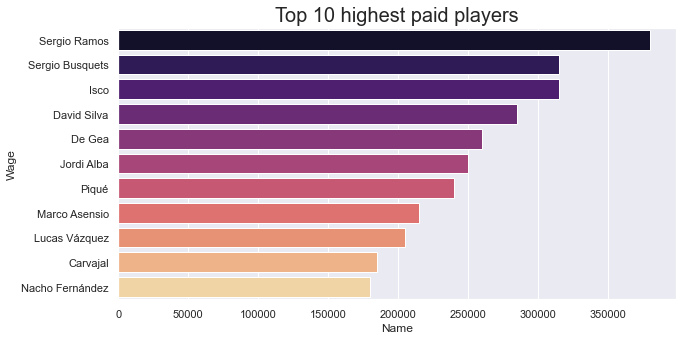

In [6]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = maxEarners['Wage'], y = maxEarners.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

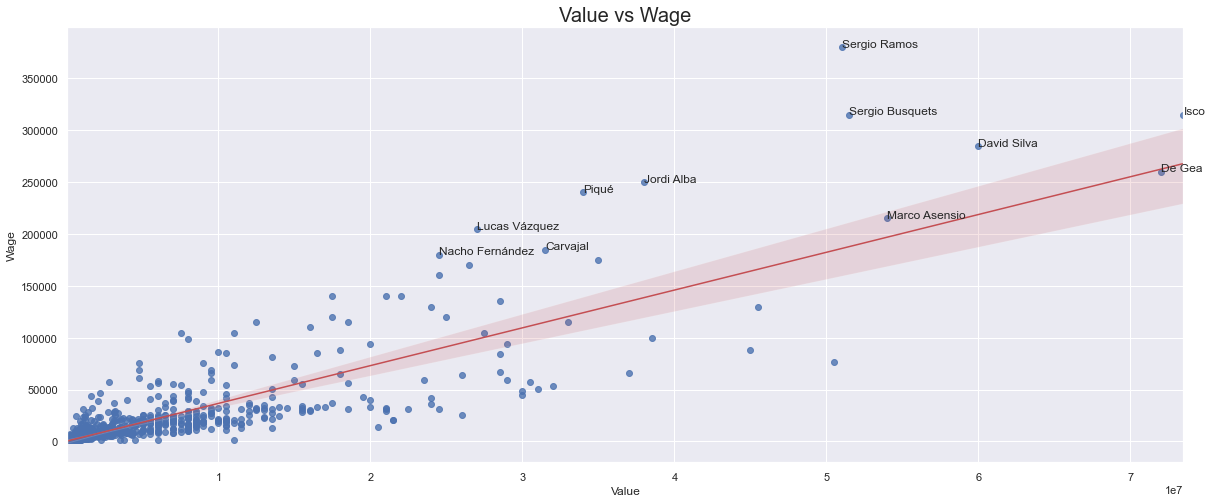

In [7]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (maxEarners['Value'][i],maxEarners['Wage'][i]))

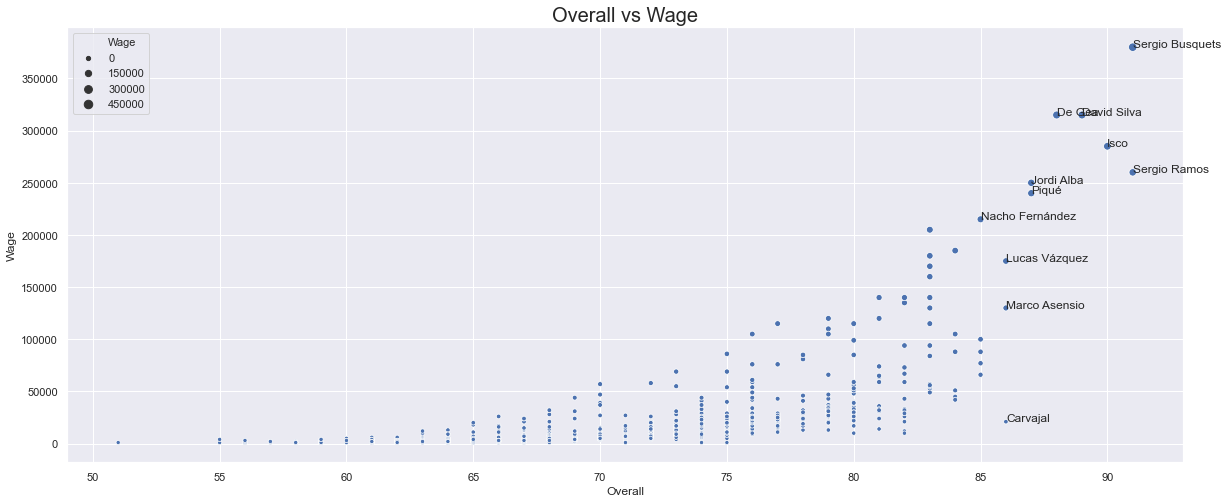

In [8]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

In [9]:
cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill Moves','Dribbling', 'Curve',
      'FKAccuracy', 'LongPassing', 'BallControl', 'Agility', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
      'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Reactions', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
      'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][0]))
    i += 1

Best Crossing : Pedro León
Best Finishing : Iago Aspas
Best HeadingAccuracy : Aduriz
Best ShortPassing : David Silva
Best Volleys : Thiago
Best Skill Moves : Thiago
Best Dribbling : Isco
Best Curve : Parejo
Best FKAccuracy : Parejo
Best LongPassing : Koke
Best BallControl : Isco
Best Agility : Deulofeu
Best Acceleration : Adama
Best SprintSpeed : Adama
Best Agility : Deulofeu
Best Reactions : De Gea
Best Balance : Aridai
Best ShotPower : Pardo
Best Jumping : Sergio Ramos
Best Stamina : De Marcos
Best Strength : Garrido
Best LongShots : Marco Asensio
Best Reactions : De Gea
Best Aggression : Diego Costa
Best Interceptions : Sergio Ramos
Best Positioning : David Silva
Best Vision : Iniesta
Best Penalties : David Villa
Best Composure : David Silva
Best Marking : Piqué
Best StandingTackle : Sergio Ramos
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : De Gea
Best GKKicking : De Gea
Best GKPositioning : De Gea
Best GKReflexes : De Gea


In [10]:
target = "Overall"
predictors = list(df.columns)
for r in [target,"Name","Age","Nationality","Position","Weak Foot","Preferred Foot", "Work Rate"]:
  predictors.remove(r)
#print(target,predictors)

In [11]:
def numColumns(col):
    if type(list(df[col])[0]) == float:
        return col

numberPreds = []

for c in df.columns:
    temp = numColumns(c)
    if temp != None:
        numberPreds.append(temp)

#numberPreds

In [12]:
scaler = StandardScaler()
numberPreds.append(target)
# print(predictors,target)
scaled_df = pd.DataFrame(data=scaler.fit_transform(df[numberPreds]),columns=numberPreds)

numberPreds.remove(target)

X = scaled_df[numberPreds]
y = scaled_df[target]

print(X.shape,y.shape)

(1072, 40) (1072,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state= 1)
mlpReg = MLPRegressor(max_iter=170)
mlpReg.fit(X_train.values,y_train.values)

MLPRegressor(max_iter=170)

In [39]:
preds = mlpReg.predict(X_test)
score = r2_score(y_test,preds)
mae_mlp = mean_absolute_error(y_test,preds)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_mlp)
#This is the weighted variance in our calculations 1.0 is maximum
print('R2 score:', score)

Mean-Absolute-Error:  0.19346325130619224
R2 score: 0.8071159236873543


In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
preds_lr = lr.predict(X_test)
score_lr = r2_score(y_test,preds_lr)
mae_lr = mean_absolute_error(y_test,preds_lr)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_lr)
#This is the weighted variance in our calculations 1.0 is maximum
print('R2 score:', score_lr)

Mean-Absolute-Error:  0.25221332793454987
R2 score: 0.8068425682874968


In [42]:
random = RandomForestRegressor(n_jobs=-1, n_estimators=100)
random.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [43]:
preds_rf = random.predict(X_test)
score_rf = r2_score(y_test,preds_rf)
mae_rf = mean_absolute_error(y_test,preds_rf)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_rf)
#This is the weighted variance in our calculations 1.0 is maximum
print ('R2 score: ', score_rf)

Mean-Absolute-Error:  0.14907044257786856
R2 score:  0.9559596075928756
